In [ ]:
#Libs for data manupulations
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nayanack/water-probability")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'water-probability' dataset.
Path to dataset files: /kaggle/input/water-probability


In [ ]:
import pandas as pd
import os

# Show actual path
print("Dataset path:", path)

# List files inside the downloaded folder
print(os.listdir(path))

# Load the CSV file (adjust filename if needed)
dataset = pd.read_csv(os.path.join(path, "water_potability.csv"))

# Preview first few rows
dataset.head()


Dataset path: /kaggle/input/water-probability
['water_potability.csv']


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#printing top 5 records of the dataset loaded
dataset.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
#printing all the features of the dataset
dataset.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
#total number of rows and columns in the dataset
dataset.shape

(3276, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Libs for data visualiztion
import seaborn as sns
import matplotlib.pyplot as plt

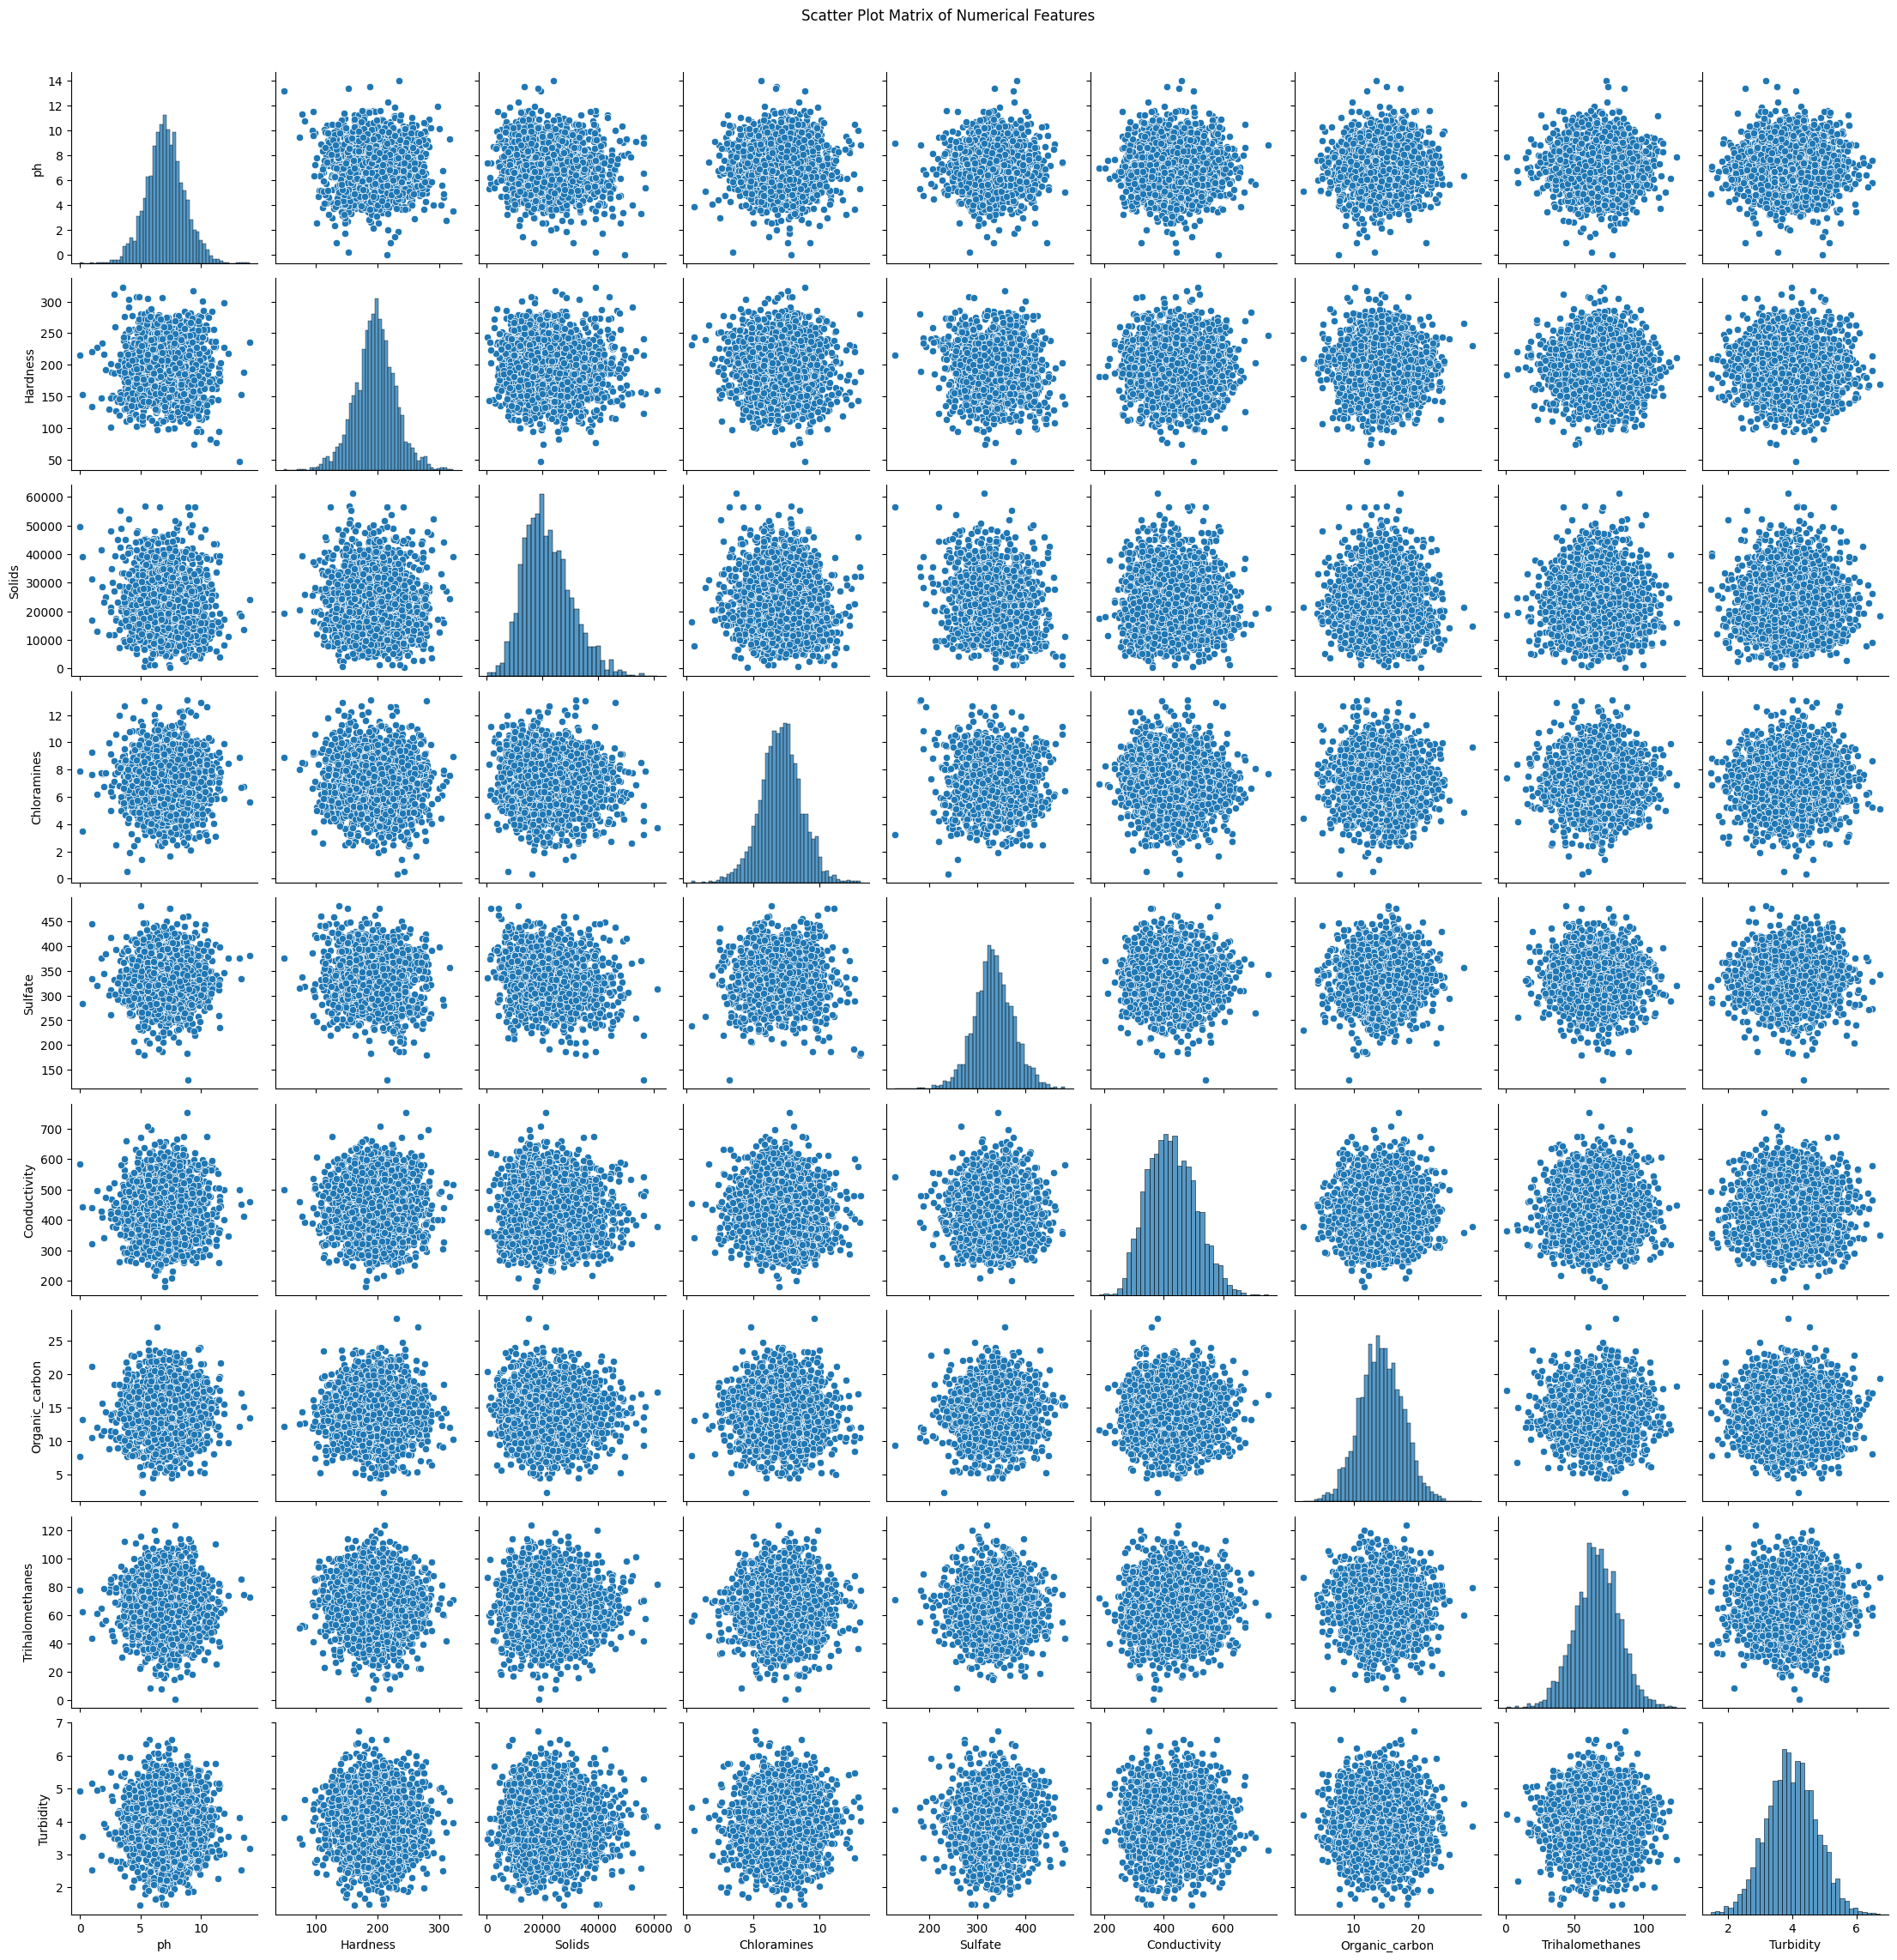

In [ ]:
# Selecting numerical features
numerical_features = dataset.select_dtypes(include='float64')

# Creating scatter plot matrix
sns.pairplot(numerical_features)
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

In [ ]:
#No strong correlation between features
#Data is fairly well-spread and balanced
#Diagonal histograms look bell-shaped - SVM or logistic
#since plots look similar and uncorrelated, it suggests your dataset has independent quality parameters- good for predictive modeling of potability.

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#DATA CLEANING

In [ ]:
dataset.isnull().sum(axis=0).sort_values(ascending=False)

,0
Sulfate,781
ph,491
Trihalomethanes,162
Hardness,0
Chloramines,0
Solids,0
Conductivity,0
Organic_carbon,0
Turbidity,0
Potability,0


In [ ]:
#find the feature having null values
null_features=dataset.columns[dataset.isnull().any()].tolist()
print(null_features)
#finding the nuber of records which have all the null_feature as null
null_records = dataset[null_features].isnull().all(axis=1).sum()

['ph', 'Sulfate', 'Trihalomethanes']


In [ ]:
#removing the null_records from the dataset
filtered_dataset = dataset.dropna(how='all', subset=null_features)
print(len(filtered_dataset))

3267


{1: 1105, 0: 2011, 2: 151, 3: 9}


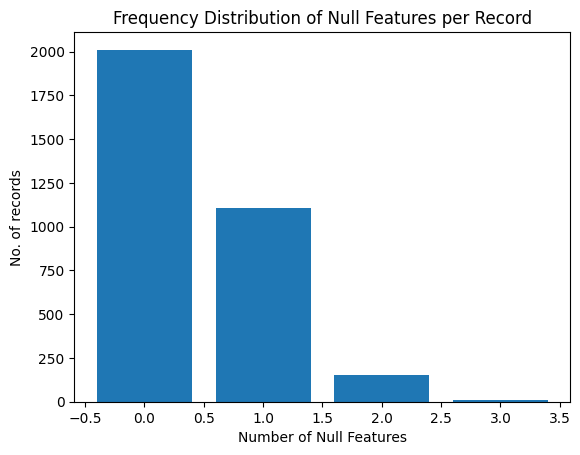

In [ ]:
null_counts_per_record = dataset.isnull().sum(axis=1)

# Counting the occurrence of each count in null_counts_per_record
null_features_dict = {}
for count in null_counts_per_record:
    if count in null_features_dict:
        null_features_dict[count] += 1
    else:
        null_features_dict[count] = 1

print(null_features_dict)
plt.bar(null_features_dict.keys(), null_features_dict.values())
plt.xlabel('Number of Null Features')
plt.ylabel('No. of records')
plt.title('Frequency Distribution of Null Features per Record')
plt.show()

In [ ]:
#we still have good nuber of null values but no such records where all the null_features are null.
#So we can handle these remaning null values by
filtered_dataset.isnull().sum(axis=0).sort_values(ascending=False)

,0
Sulfate,772
ph,482
Trihalomethanes,153
Hardness,0
Chloramines,0
Solids,0
Conductivity,0
Organic_carbon,0
Turbidity,0
Potability,0


In [ ]:
# Filter rows with only null values
filtered_null_features=dataset.columns[dataset.isnull().any()].tolist()


print(filtered_null_features)

['ph', 'Sulfate', 'Trihalomethanes']


In [ ]:
from sklearn.impute import KNNImputer
# Initialize KNNImputer with the desired number of neighbors (e.g., 20% of total rows)
total_rows = len(filtered_dataset)
desired_neighbors = int(0.20 * total_rows)            #because data is noisy + significant lenght of dataset
imputer = KNNImputer(n_neighbors=desired_neighbors)
print(total_rows, desired_neighbors)

3267 653


In [ ]:
# Impute missing values using KNN
for features in filtered_null_features:
    filtered_dataset[features] = imputer.fit_transform(filtered_dataset[[features]])


# Replace the original null records with the imputed values
filtered_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
filtered_dataset.isnull().sum(axis=0).sort_values(ascending=False)

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
filtered_dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000
mean,7.080795,196.366063,22013.423893,7.123074,333.775777,426.144283,14.288057,66.396293,3.966987,0.390878
std,1.471980,32.893960,8760.888319,1.583597,36.192376,80.787862,3.308664,15.791595,0.780835,0.488022
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277117,176.847379,15665.106976,6.128488,316.994734,365.729707,12.066072,56.570533,3.439682,0.000000
50%,7.080795,196.952875,20965.478309,7.130437,333.775777,421.879854,14.221757,66.396293,3.955154,0.000000
75%,7.872617,216.660337,27334.162293,8.115043,350.416395,481.609194,16.559152,76.723143,4.500432,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


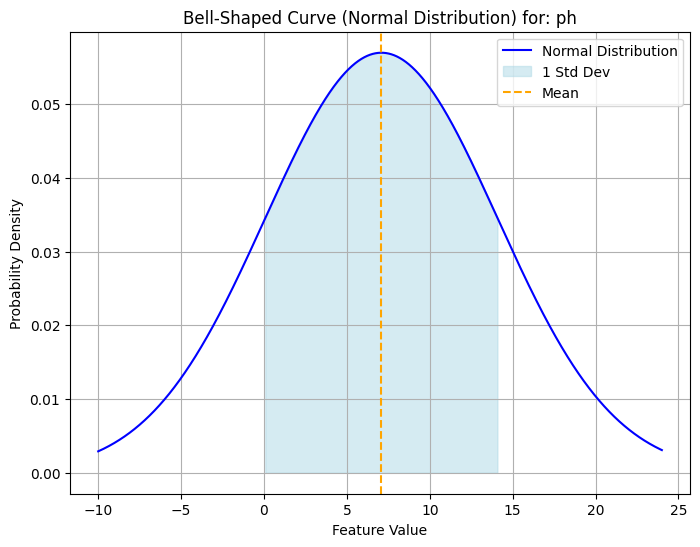

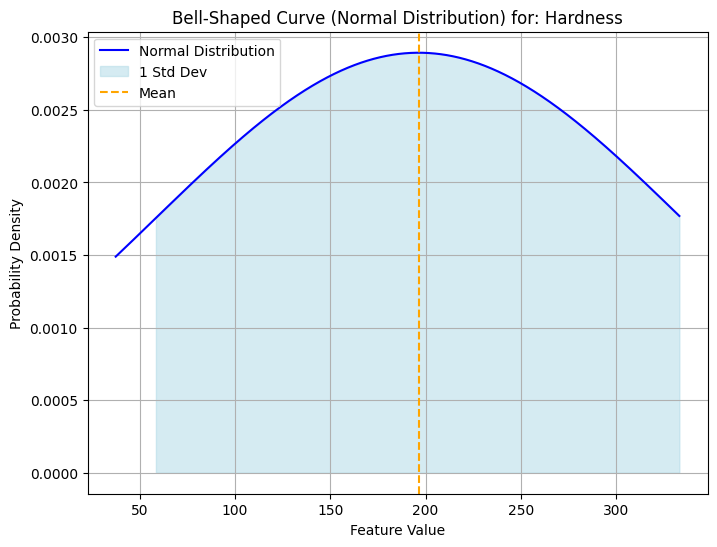

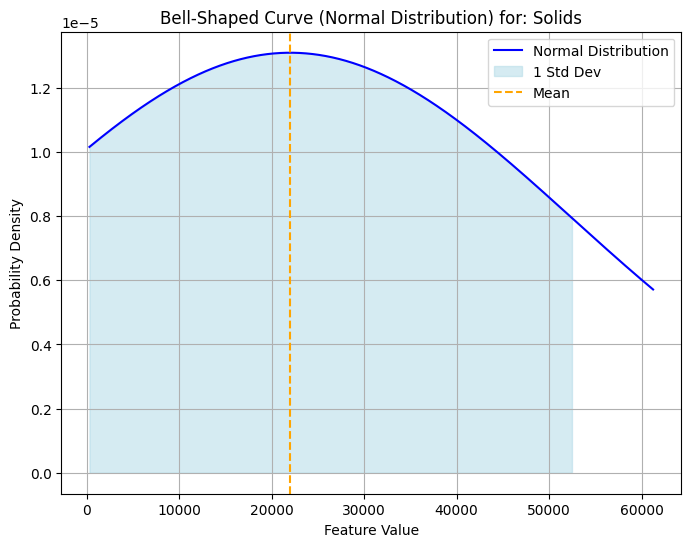

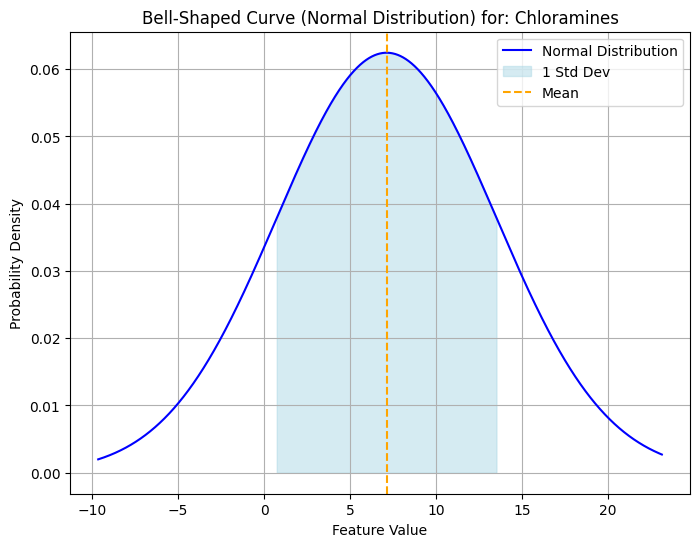

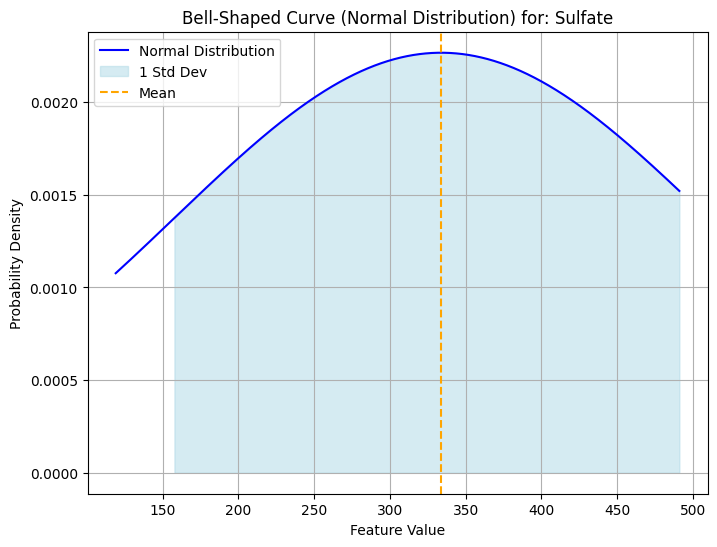

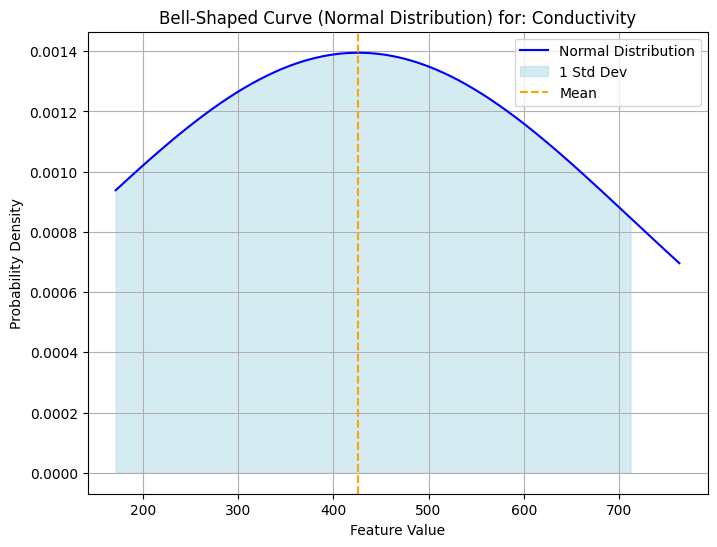

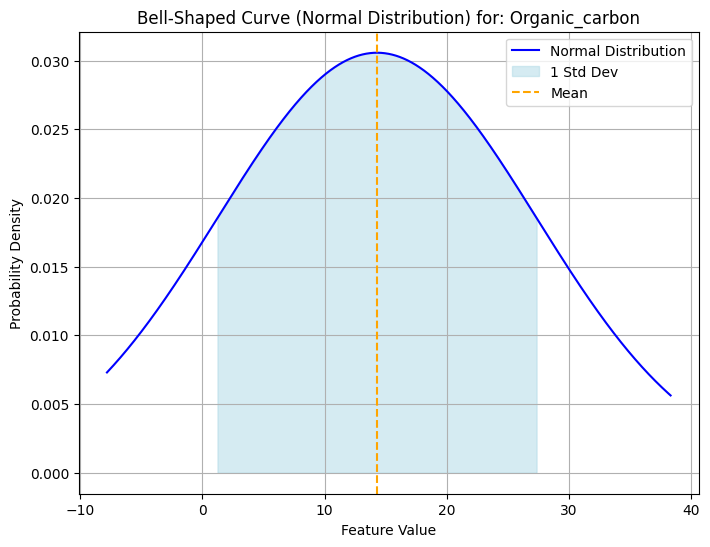

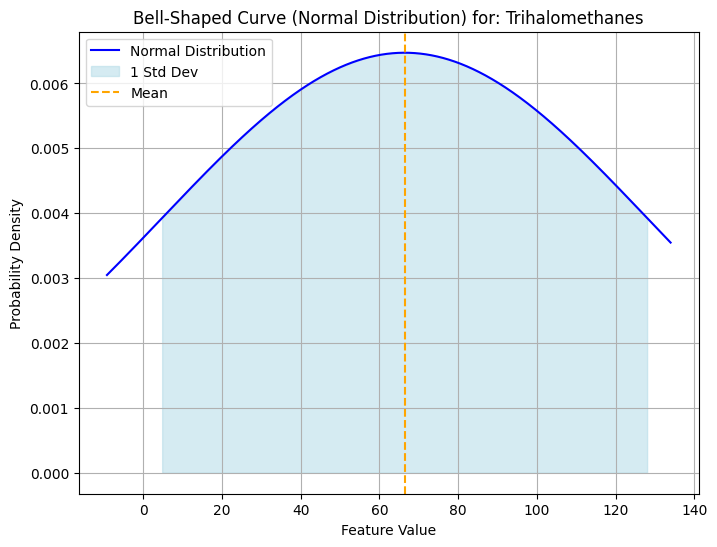

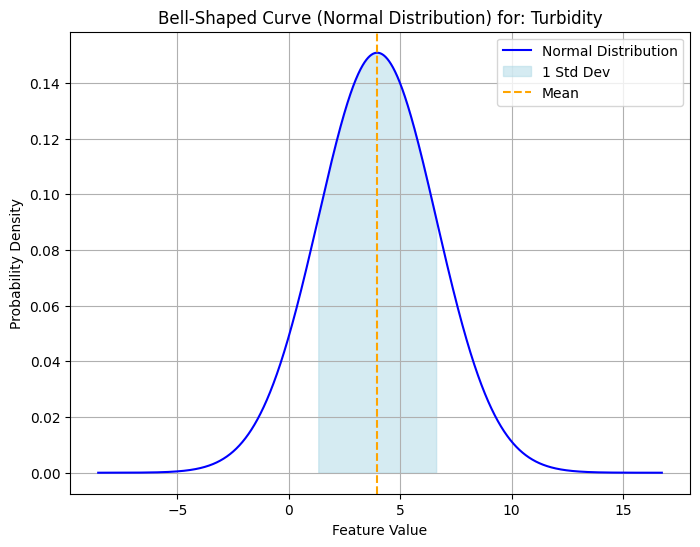

In [ ]:
from scipy.stats import norm

for features in numerical_features:
    # Given feature statistics (replace with your actual values)
    mean_value = filtered_dataset[features].mean()  # Corrected: .mean() method
    min_value = filtered_dataset[features].min()
    max_value = filtered_dataset[features].max()  #Define the range of data for that feature

    # Create a range of x-values (assuming a reasonable range)
    x = np.arange(min_value - 10, max_value + 10, 0.001)  #np.arange(start, stop, step)

    # Calculate the probability density function (PDF) for the normal distribution
    y = norm.pdf(x, mean_value, np.std([min_value, max_value]))

    # Plot the bell-shaped curve
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, color='blue', label='Normal Distribution')
      # Shade the area representing one standard deviation
    plt.fill_between(x, y, where=(x >= mean_value - np.std([min_value, max_value])) & (x <= mean_value + np.std([min_value, max_value])),
                 color='lightblue', alpha=0.5, label='1 Std Dev')

    # Shade the area representing the mean
    plt.axvline(x=mean_value, color='orange', linestyle='--', label='Mean')

    plt.xlabel('Feature Value')
    plt.ylabel('Probability Density')
    plt.title(f'Bell-Shaped Curve (Normal Distribution) for: {features}')
    plt.grid(True)
    plt.legend()
    plt.show()

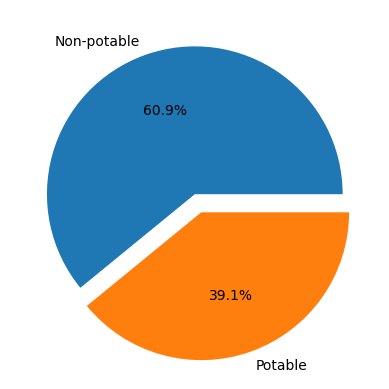

In [ ]:
# count the number of potable a non_potable water samples
potability_distribution = filtered_dataset['Potability'].value_counts().reset_index()  #.reset_index() for clean dataframe
potability_distribution.columns = ['Potability', 'Count']
potability_distribution['Potability'] = potability_distribution['Potability'].map({0: 'Non-potable', 1: 'Potable'})

# Explode Shoes slice
explode = [ 0, 0.13]
# Create pie chart
plt.pie(potability_distribution["Count"], labels=potability_distribution["Potability"],autopct='%1.1f%%', explode=explode)
# Show plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  #Both use cross-validation to test each parameter set’s performance.

#Libs for machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import train_test_split

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),   #RandomForestClassifier → multiple decision trees combined (bagging).Handles non-linear data
    'SVM': SVC(), #separates classes by finding the best hyperplane
    'Gradient Boosting': GradientBoostingClassifier(), #GradientBoostingClassifier → sequential boosting approach. Works well for high-dimensional or non-linear data
    'Neural Network': MLPClassifier()   #Multi-Layer Perceptron (feedforward neural network) for classification.
}


# Split data into X and y
X = filtered_dataset.drop(columns=['Potability'])
y = filtered_dataset['Potability']

# Split data into train test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into train and test sets (80% train, 20% test)")

print("\n")
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

results = []

Data split into train and test sets (80% train, 20% test)




In [ ]:
filtered_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Libs for preparing data for Machine learning algos
#Libs for model validation and peformance evaluations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Training and evaluating models
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })
    results_df = pd.DataFrame(results)

Model Evaluation
Predictive modeling results for water potability Prediction
                      Model  Accuracy  Precision    Recall  F1 Score  \
0       Logistic Regression  0.645260   0.000000  0.000000  0.000000   
1  Random Forest Classifier  0.672783   0.562044  0.333333  0.418478   
2                       SVM  0.701835   0.663636  0.316017  0.428152   
3         Gradient Boosting  0.681957   0.603604  0.290043  0.391813   
4            Neural Network  0.663609   0.534161  0.372294  0.438776   

    ROC AUC        Confusion Matrix  
0  0.498818    [[422, 1], [231, 0]]  
1  0.595745  [[363, 60], [154, 77]]  
2  0.614273  [[386, 37], [158, 73]]  
3  0.593012  [[379, 44], [164, 67]]  
4  0.597495  [[348, 75], [145, 86]]  




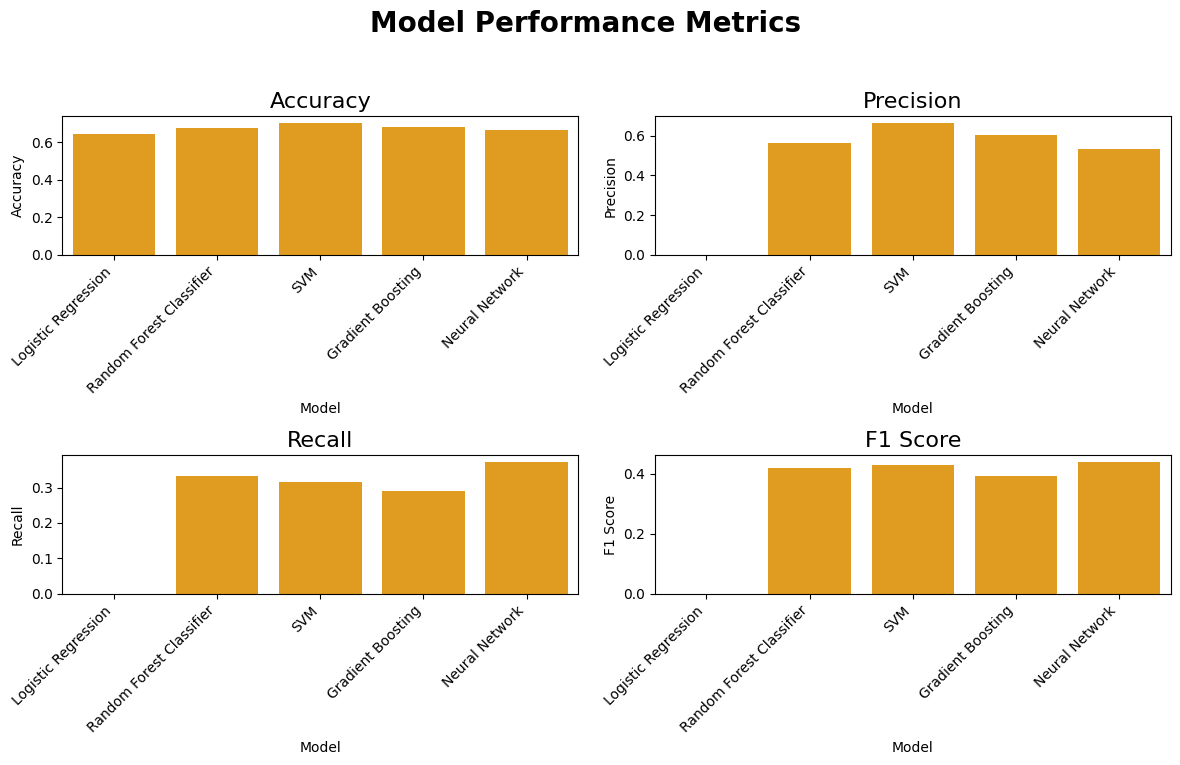

In [ ]:
print("Model Evaluation")
print("Predictive modeling results for water potability Prediction")
print(results_df)
print("\n")
# Plotting
plt.figure(figsize=(12, 8))
plt.suptitle('Model Performance Metrics', fontsize=20, fontweight='bold')

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, color='orange')
plt.title('Accuracy', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=results_df, color='orange')
plt.title('Precision', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=results_df, color='orange')
plt.title('Recall', fontsize=16)
plt.xticks(rotation=45, ha='right')

# F1 Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=results_df, color='orange')
plt.title('F1 Score', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import pickle
# Find the best-performing model based on a specific metric (accuracy)
best_model_results = sorted(results, key=lambda x: x['Accuracy'], reverse=True)[0]

# Get the best-performing model
best_model_name = best_model_results['Model']
best_model = models[best_model_name]

# Save the best-performing model to a pickle file
pickle.dump(best_model, open('best_model.pkl', 'wb'))

In [ ]:
import pickle

# Save scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [ ]:
print(best_model_results)

{'Model': 'SVM', 'Accuracy': 0.7018348623853211, 'Precision': 0.6636363636363637, 'Recall': 0.31601731601731603, 'F1 Score': 0.4281524926686217, 'ROC AUC': np.float64(0.6142734334223696), 'Confusion Matrix': array([[386,  37],
       [158,  73]])}


In [ ]:
# Sample input data
test_data = np.array(filtered_dataset.iloc[3246, :9]).reshape(1, -1)  # Assuming filtered_dataset is your dataset
# Standardize the new input da,a
test_data_scaled = scaler.transform(test_data)

# Make predictions

# Load the trained model from the pickle file
best_model = pickle.load(open('best_model.pkl', 'rb'))

# Assuming the test data is in the same format as the training data (X_test)
# Preprocess the test data if necessary (e.g., standardization)
# Assuming X_test_scaled is the preprocessed test data

# Make predictions using the loaded model
predictions = best_model.predict(test_data_scaled)

# Print the predictions
print(predictions)
#output contins 0 for non potable and 1 for potalbe.

[0]


In [ ]:
#FOR FLASK APP

In [ ]:
df = filtered_dataset
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
# Step 3: Split data into X and y
X = df.drop(columns=['Potability'])
y = df['Potability']

# Split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-Test Split Done")


Train-Test Split Done


In [ ]:
# Step 4: Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Scaling Done")


Scaling Done


In [ ]:
# Step 5: Train SVC model
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svc_model.fit(x_train_scaled, y_train)

print("Model training completed!")


Model training completed!


In [ ]:
# Step 7: Save model and scaler using pickle
import pickle

# Save SVC model
with open('svc_model.pkl', 'wb') as model_file:
    pickle.dump(svc_model, model_file)

# Save Scaler
with open('scaler2.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print(" Model and Scaler saved successfully using pickle!")


 Model and Scaler saved successfully using pickle!


In [ ]:
from google.colab import files
files.download('svc_model.pkl')
files.download('scaler2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 6: Evaluate model performance
y_pred = svc_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7018348623853211

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       423
           1       0.66      0.32      0.43       231

    accuracy                           0.70       654
   macro avg       0.69      0.61      0.61       654
weighted avg       0.69      0.70      0.67       654



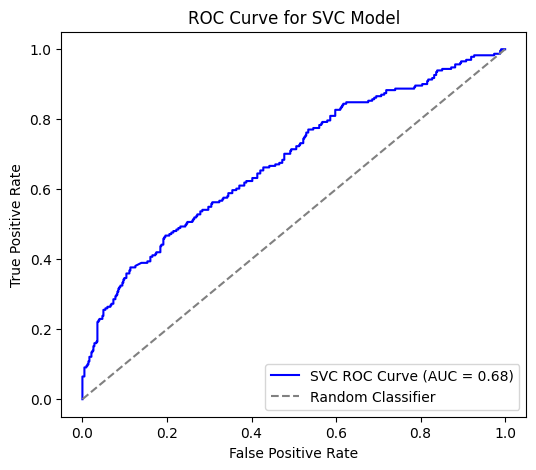

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 8: Get prediction probabilities for the positive class
y_prob = svc_model.predict_proba(x_test_scaled)[:, 1]

# Step 9: Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 10: Calculate Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'SVC ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Model')
plt.legend(loc='lower right')
plt.show()
